# **Image Registration Through ORB Feature Matching Using Python (cv2)**
---

## **Overview**
This code demonstrates image registration using ORB feature matching to align a distorted image with its original version. ORB (Oriented FAST and Rotated BRIEF) is utilized to detect and compute feature points, while a homography matrix is estimated using RANSAC to correct geometric distortions. This technique is valuable in image stitching, object recognition, and tracking applications.

## **1. Importing Libraries**
- `cv2`: OpenCV library for computer vision operations.
- `numpy`: A library for numerical computations, especially for handling arrays.
- `matplotlib.pyplot`: A library to display images and plots.

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## **2. Reading and Preprocessing Images**
- `cv2.imread()`: Loads the original and distorted images.
- `cv2.cvtColor()`: Converts both images from BGR to grayscale, as ORB operates on single-channel images for efficiency.

In [29]:
original_img = cv2.imread("/content/monkey.jpg")
distorted_img = cv2.imread("/content/monkey_distorted.jpg")

In [30]:
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)
distorted_img = cv2.cvtColor(distorted_img, cv2.COLOR_BGR2GRAY)

## **3. ORB Feature Detection and Description**
- `cv2.ORB_create(50)`: Initializes an ORB detector with a maximum of 50 keypoints.
- `detectAndCompute()`: Detects keypoints and computes their descriptors in both images.
  - `kp1`, `kp2`: Lists of keypoints for the distorted and original images, respectively.
  - `des1`, `des2`: Descriptors for each keypoint list.

In [31]:
orb = cv2.ORB_create(50)

kp1, des1 = orb.detectAndCompute(distorted_img, None)
kp2, des2 = orb.detectAndCompute(original_img, None)

## **4. Feature Matching with Brute-Force Hamming Matcher**
- `cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)`: Creates a Brute-Force matcher using the Hamming distance, suitable for binary descriptors like those from ORB.
- `matcher.match()`: Matches descriptors from both images.
- `sorted(matches, key=lambda x: x.distance)`: Sorts the matches based on distance, with smaller distances representing better matches.

In [32]:
matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)

matches = matcher.match(des1, des2, None)
matches = sorted(matches, key=lambda x: x.distance)

## **5. Extracting Matched Points**
- Initializes two arrays, `points1` and `points2`, to store the coordinates of matched keypoints from both images.
- `match.queryIdx`: Retrieves the index of the keypoint in the first image (distorted).
- `match.trainIdx`: Retrieves the index of the matching keypoint in the second image (original).

In [33]:
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
    points1[i, :] = kp1[match.queryIdx].pt
    points2[i, :] = kp2[match.trainIdx].pt

## **6. Finding the Homography Matrix Using RANSAC**
- `cv2.findHomography()`: Estimates a homography matrix h between the two sets of points.
  
  **Parameters**:
    - `points1`, `points2`: Corresponding points between the distorted and original images.
    - `cv2.RANSAC`: The RANSAC algorithm, robust against outliers.
  
  **Returns**:
    - `h`: The 3x3 homography matrix mapping points1 to points2.
    - `mask`: Identifies inliers used in the homography calculation.

In [34]:
h, mask = cv2.findHomography(points1, points2, cv2.RANSAC)

## **7. Applying the Homography to Align Images**
- `cv2.warpPerspective()`: Warps the distorted image using the homography matrix h, aligning it to the original image.
  
  **Parameters**:
    - `distorted_img`: The distorted image to be aligned.
    - `h`: The homography matrix.
    - `(width, height)`: Output dimensions, matching the original image’s size.

In [35]:
height, width = original_img.shape

registered_distorted_img = cv2.warpPerspective(distorted_img, h, (width, height))

## **8. Drawing Keypoint Matches**
- `cv2.drawMatches`: Visually compare keypoints between two images, `distorted_img` and `original_img`, by drawing lines between matched keypoints

  **Parameters**
    - `distorted_img`: The first input image (usually the image with perspective distortion).
    - `kp1`: Keypoints detected in distorted_img.
    - `original_img`: The second input image (typically the reference or original image).
    - `kp2`: Keypoints detected in original_img.
    - `matches[:100]`: A list of DMatch objects representing the best matches between kp1 and kp2 keypoints. [:100] limits the display to the top 100 matches.
    - `None`: Mask, which is optional. Setting this to None draws all matches provided.

In [41]:
matched_img = cv2.drawMatches(distorted_img, kp1, original_img, kp2, matches[:100], None)

## **9. Visualizing the Results with Subplots**
- Displays the original, distorted, registered, and matched images in a 2x2 subplot grid for easy comparison.

(-0.5, 439.5, 329.5, -0.5)

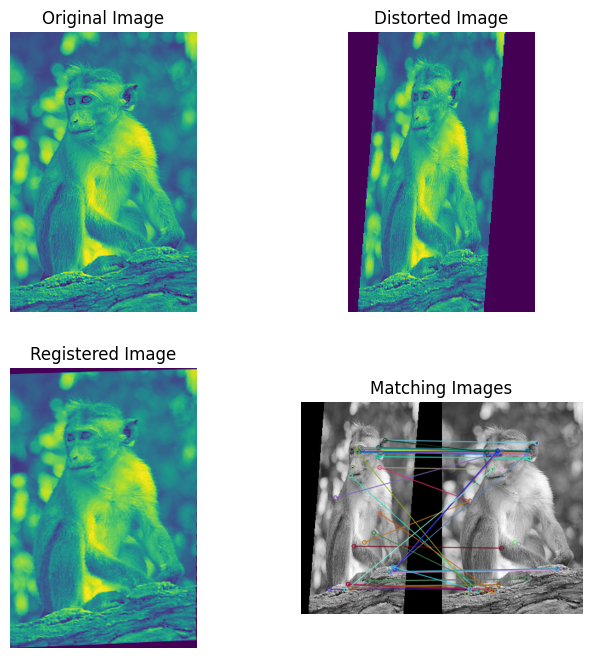

In [42]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

axs[0, 0].imshow(original_img)
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

axs[0, 1].imshow(distorted_img)
axs[0, 1].set_title('Distorted Image')
axs[0, 1].axis('off')

axs[1, 0].imshow(registered_distorted_img)
axs[1, 0].set_title('Registered Image')
axs[1, 0].axis('off')

axs[1, 1].imshow(matched_img)
axs[1, 1].set_title('Matching Images')
axs[1, 1].axis('off')